In [2]:
import os
import sys
import pandas as pd
pd.set_option('display.max_rows', 200)

current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)

# from swp.utils.setup import seed_everything, set_device
# from swp.datasets.phonemes import get_phoneme_to_id

# seed_everything()
# device = set_device()
# phoneme_to_id = get_phoneme_to_id()

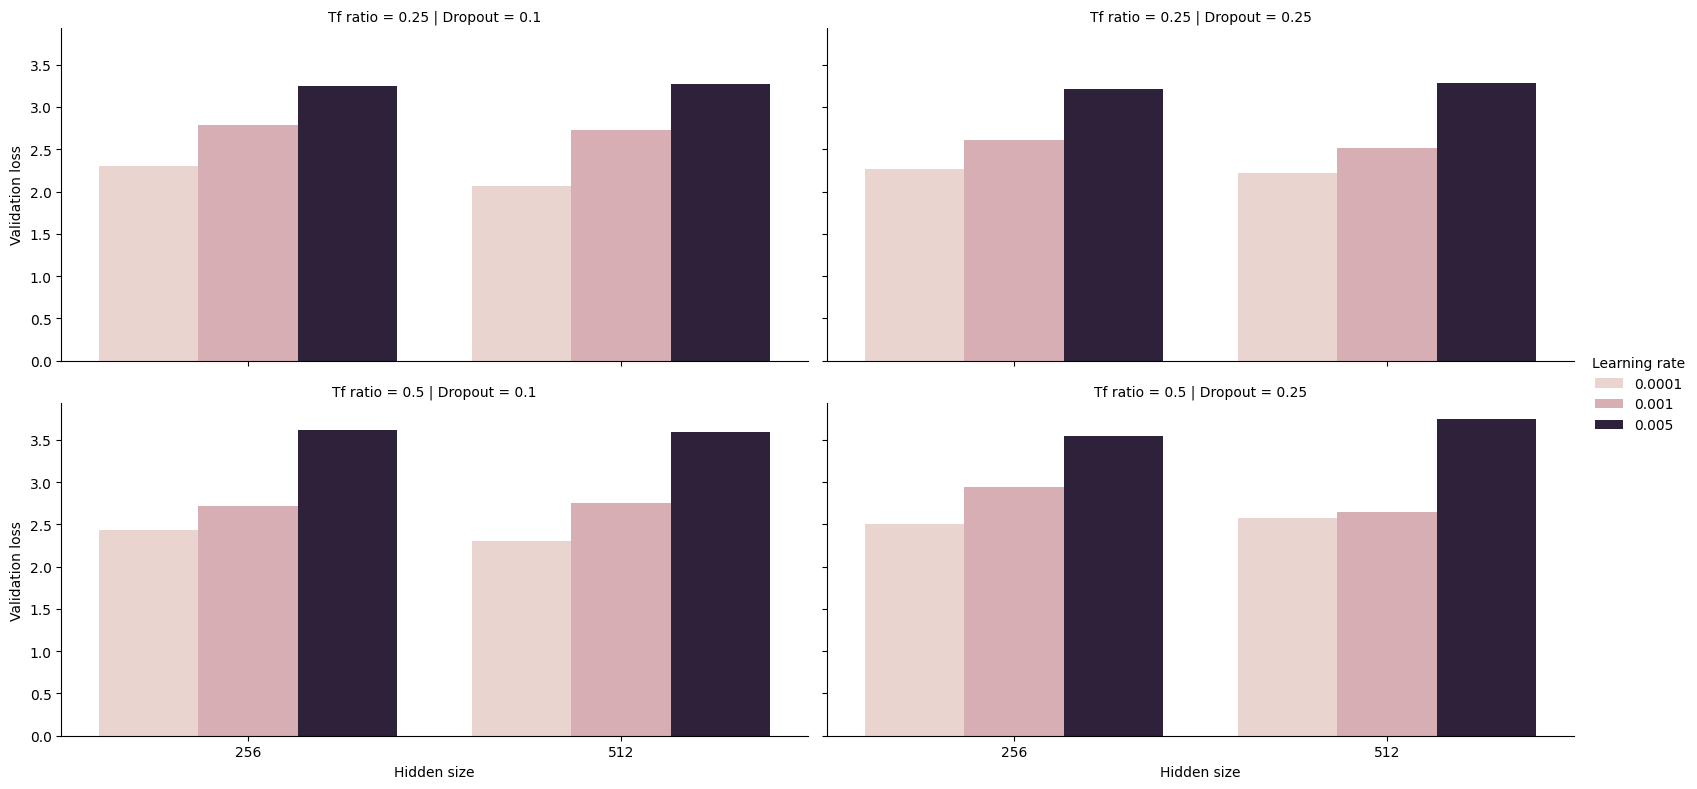

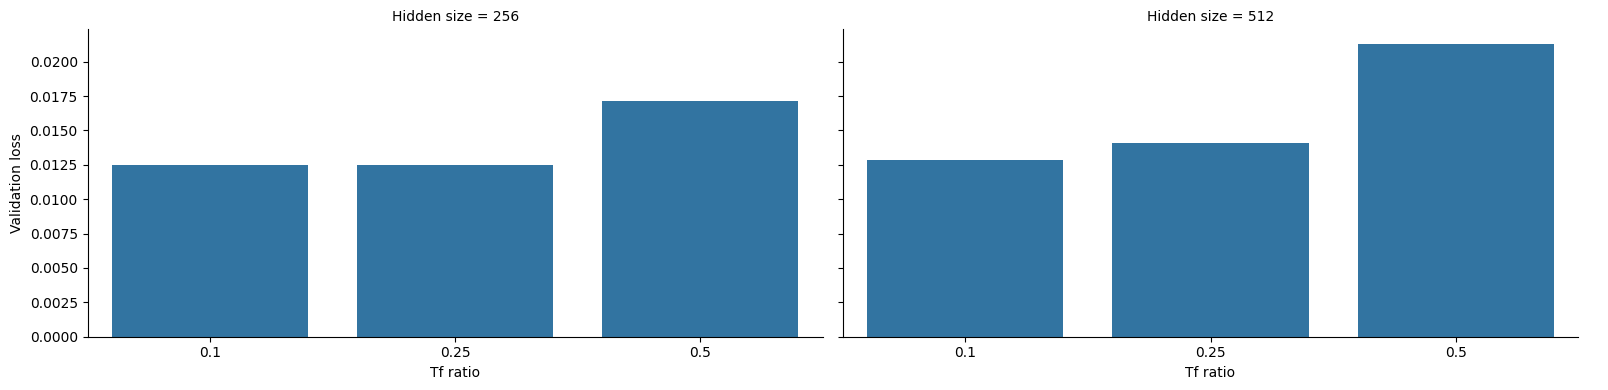

,Unnamed: 0,Model name,Training name,Model type,Start token id,Recurrent type,Hidden size,Num layers,Dropout,Tf ratio,CNN hidden size,CorNet model,Batch size,Learning rate,Fold,Include stress,Epoch,Train loss,Validation loss
3621,3621,Ua_LSTM_h256_l1_v42_d0.5_t0.1_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.5,0.10,NaN,NaN,1024,0.001,0,False,49,0.000377,0.012505
1351,1351,Ua_LSTM_h256_l1_v42_d0.5_t0.25_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.5,0.25,NaN,NaN,1024,0.001,0,False,49,0.000316,0.012511
2771,2771,Ua_LSTM_h512_l1_v42_d0.5_t0.1_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.5,0.10,NaN,NaN,1024,0.001,0,False,49,0.000370,0.012828
3821,3821,Ua_LSTM_h512_l1_v42_d0.5_t0.25_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.5,0.25,NaN,NaN,1024,0.001,0,False,49,0.000372,0.014112
1751,1751,Ua_LSTM_h256_l1_v42_d0.5_t0.5_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,256,1,0.5,0.50,NaN,NaN,1024,0.001,0,False,49,0.000420,0.017155
751,751,Ua_LSTM_h512_l1_v42_d0.5_t0.5_s1,b1024_l0.001_f0_sn,Ua,1,LSTM,512,1,0.5,0.50,NaN,NaN,1024,0.001,0,False,49,0.000409,0.021283


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from swp.utils.grid_search import grid_search_aggregate

# Aggregate the results
# grid_search_aggregate()

# Load the results with pandas 
results = pd.read_csv('../results/gridsearch/aggregated_training.csv')

# Get only column Epoch = 50 and sort by validation accuracy
results = results[results['Epoch'] == 49]

rnns = results[results['Recurrent type'] == 'RNN']
rnns = rnns.sort_values(by='Validation loss')
sns.catplot(
    data=rnns, 
    y='Validation loss', 
    x="Hidden size", 
    row="Tf ratio", 
    col="Dropout", 
    hue="Learning rate", 
    kind='bar',
    height=4,
    aspect=2
)
plt.show()

lstms = results[results['Recurrent type'] == 'LSTM']
lstms = lstms[lstms["Learning rate"] == 0.001]
lstms = lstms[lstms["Dropout"] == 0.5]
lstms = lstms.sort_values(by='Validation loss')
sns.catplot(
    data=lstms, 
    y='Validation loss', 
    x="Tf ratio", 
    col="Hidden size", 
    kind='bar',
    height=4,
    aspect=2
)
plt.show()
lstms
